In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


----

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## Exploring the relationship between Popularity of a film and its Rating

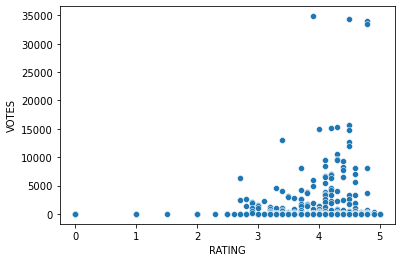

In [8]:
sns.scatterplot(data=fandango, y='VOTES', x='RATING');

In [9]:
# Calculating the correlation btw the columns
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [11]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [12]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [13]:
# How man movies are in the Fandango DataFrame per year?
fandango['YEAR'].value_counts()

2015    478
2014     23
2012      1
2016      1
1964      1
Name: YEAR, dtype: int64

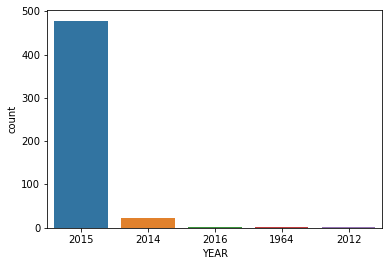

In [14]:
# Vosualizing the count of movies per year with a plot
sns.countplot(data=fandango, x='YEAR');

In [15]:
# Movies with the Highest number of votes
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [17]:
# Movies with zero votes
#no_votes = fandango['VOTES'] == 0
#no_votes.sum()

len(fandango[fandango['VOTES'] == 0])

69

In [18]:
fan_reviewed = fandango[fandango['VOTES'] > 0]

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

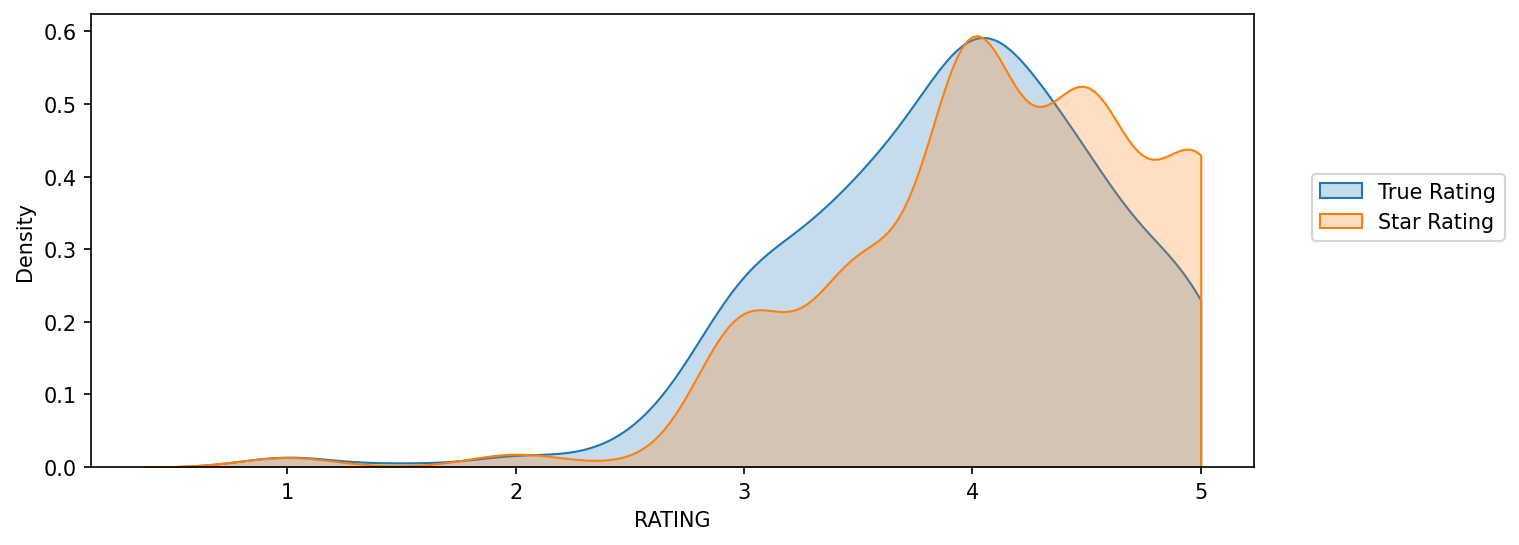

In [23]:
plt.figure(figsize=(10,4), dpi=150)

sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0,5], fill=True, label='True Rating');
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0,5], fill=True, label='Star Rating');
plt.legend(loc=(1.05,0.5));

In [24]:
# Quantifying the discrepancy
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

<ipython-input-24-085ce0a310e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [27]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)
fan_reviewed

<ipython-input-27-40093424dcfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


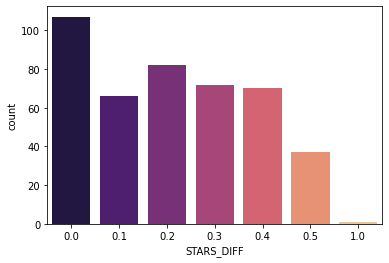

In [28]:
# A Count plot to display the number of times a certain different occurs
sns.countplot(data=fan_reviewed, x='STARS_DIFF',palette='magma');

#### We can see from the plot that one movie was displaying over a 1 star difference than its true rating! 

In [29]:
# What movie had this close to 1 star differential?
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [31]:
all_sites = pd.read_csv('all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [32]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [33]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes(RT)

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

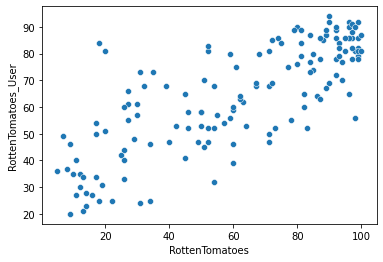

In [34]:
# Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User');

In [36]:
# Creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes.
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


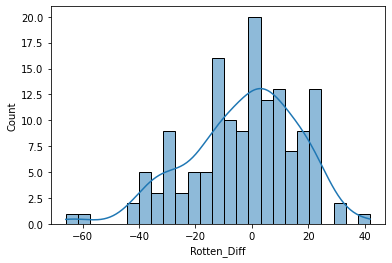

In [39]:
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25);

In [37]:
# Calculating the Mean Absolute Difference between RT scores and RT User scores as described above.
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

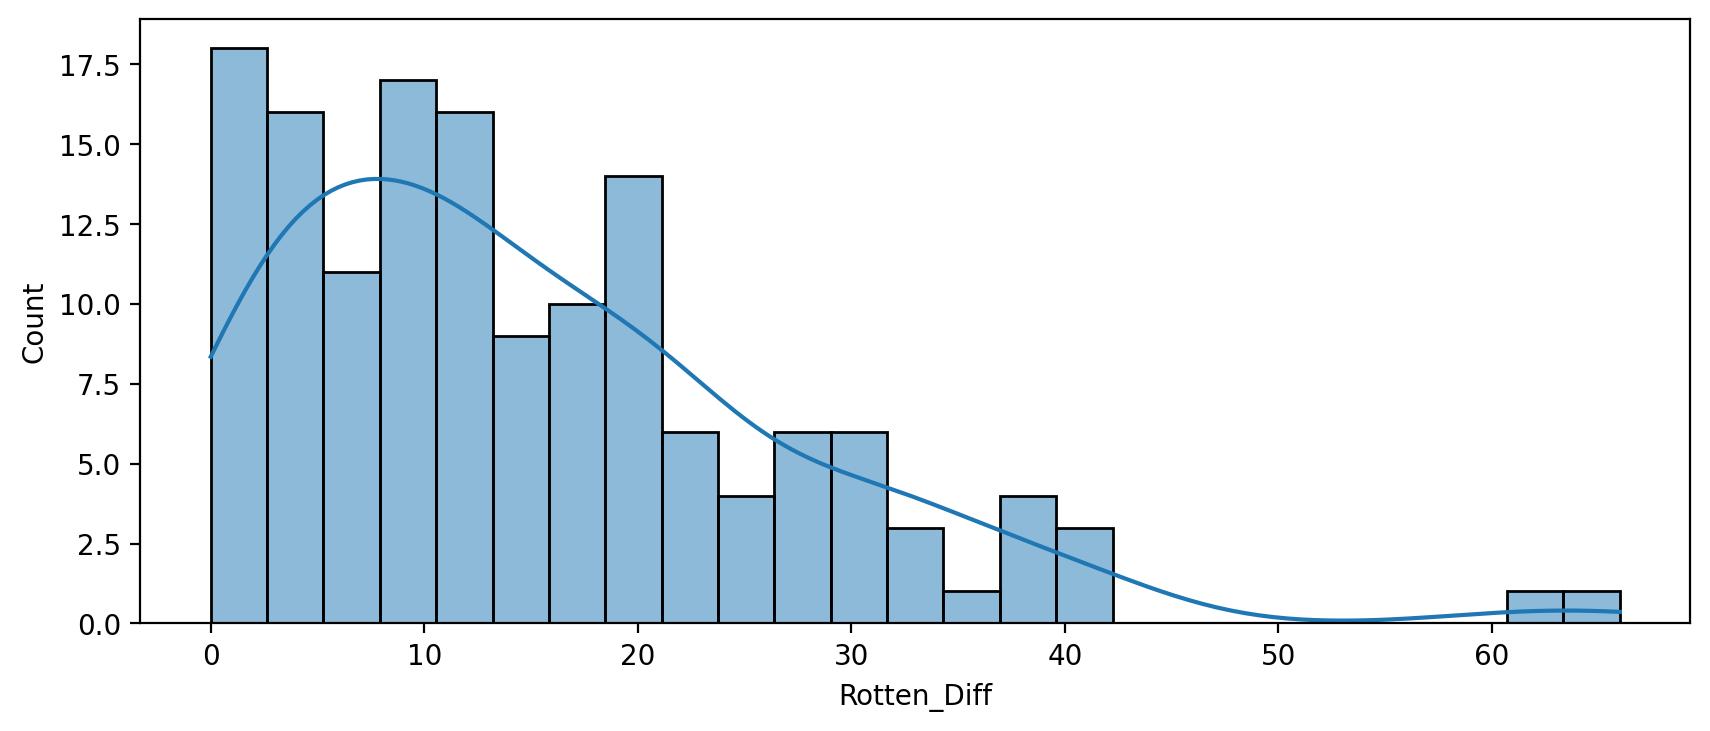

In [41]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25);